In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import kaepora as kpora
import kaepora_plot as kplot
import spectral_analysis as sa

In [13]:
test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel > -11. and (x1 >= -4 and x1 < 2)",
                "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel < -11. and (x1 >= -4 and x1 < 2)"]


In [9]:
composites_test, sn_arrays_test, og_sn_arrays_test, boot_sn_arrays_test = kpora.make_composite(test_queries, shape_param='x1', boot=True, medmean=1, verbose=True, gini_balance=True, combine=True, get_og_arr=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -4 and 4 and vel > -11. and (x1 >= -4 and x1 < 2)
40 Total Spectra found
0 flagged spectra removed 40 spectra left
0 spectra of peculiar Ias removed 40 spectra left
33 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
30 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2006ax_combined None foundation 165.56372705536174 -3.096108916051463 0.146647604347 3674.0 8922.0
ps16fbb_combined None foundation 218.6574944659539 -2.3248654947353624 0.45423476661300005 3184.0 8788.0
2007bc_combined None foundation 101.6890246430634 0.4660799267653665 -1.10313078363 3246.0 10372.0
2008fp 2008fp-54730.35.dat foundation 101.344509658 -0.700254260887 0.24764149609 3810.0 9080.0
ps15aii ps15aii_20150517_goodman_Foundation.dat foundation 91.1538904215 -0.377604488655 0.171664539164 3398.0 6686.0
ps17bii 

Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


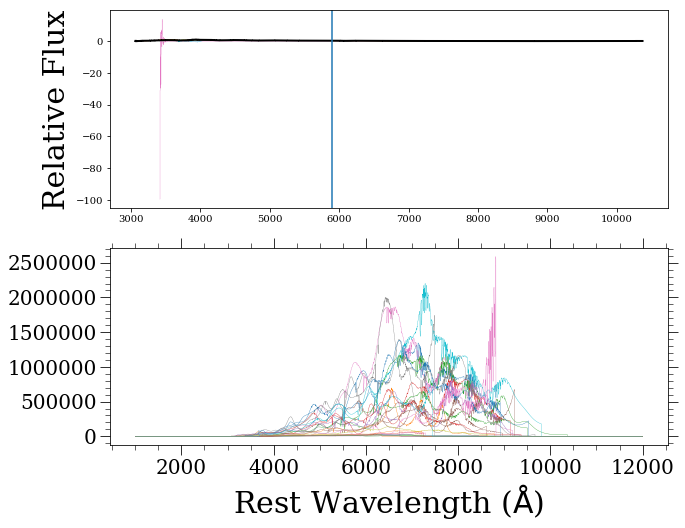

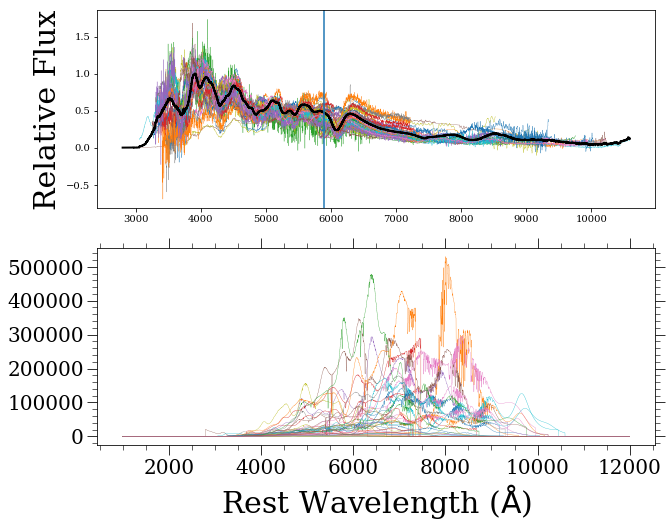

In [10]:
kplot.plot_comp_and_all_spectra(composites_test[0], sn_arrays_test[0], show_ivar=True)
kplot.plot_comp_and_all_spectra(composites_test[1], sn_arrays_test[1], show_ivar=True)

Phase:  -0.10232570602264457
dm15:  -0.811598906704453
Redshift:  0.021943871468481913
HR:  0.19926857190732356
Phase:  -0.7932165657589342
dm15:  -0.9878481375617624
Redshift:  0.019870846280586097
HR:  29.54487728508793


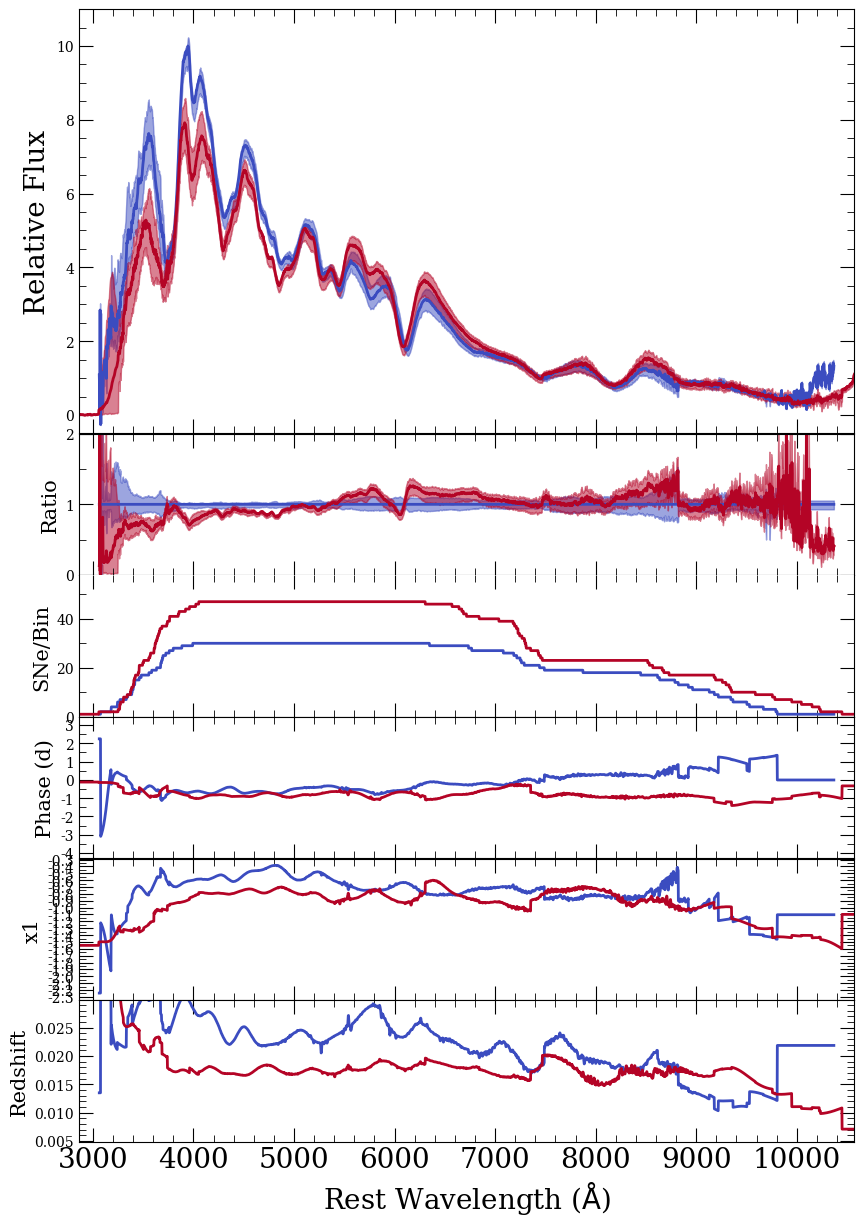

In [11]:
kpora.set_min_num_spec(composites_test, 5)
kplot.comparison_plot(composites_test, scale_type=False, min_num_show=1, extra=False, legend_labels = None,
                      savename = None)

-11.095173645785795
-12.958200562113579



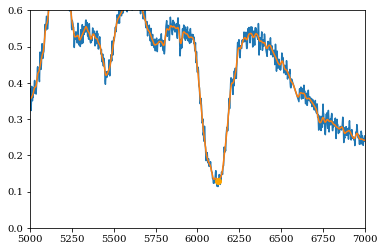

1996bo-50390.27.dat 3.02588731211 -11.290779369257717 0.016321291178


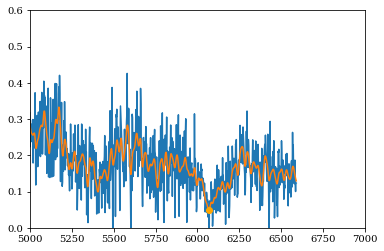

ps16bnz_20160406_kosmos_Foundation.dat -3.29536595464 -13.84440774713146 0.0627


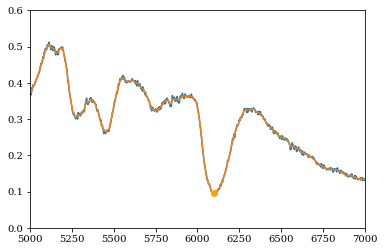

1998dh-51029.36.dat -0.292082732869 -12.368724114647867 0.00922638287318


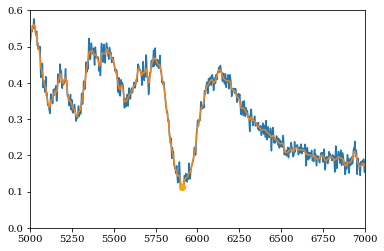

2006os-54061.18.dat -3.39074063703 -21.826537026037055 0.0321022085219


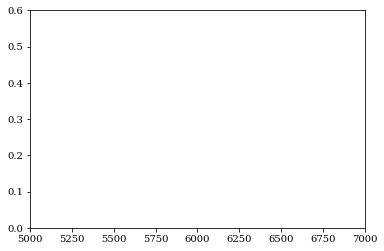

ps15atx_20150620_SALT_Foundation.dat -0.122152399995 -12.761590299337318 0.0718807


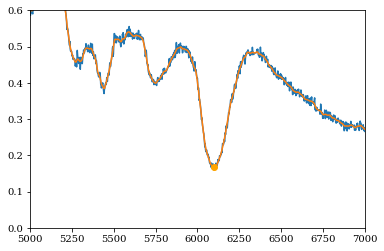

1997e-50464.25.dat -3.73654549572 -12.368724114647867 0.0135260240603


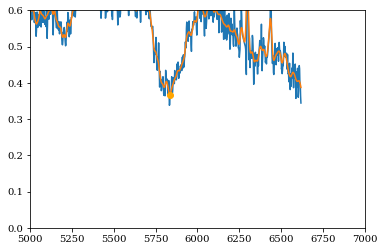

2005ku-53699.13.dat 0.560567050233 -25.47958315373969 0.04541


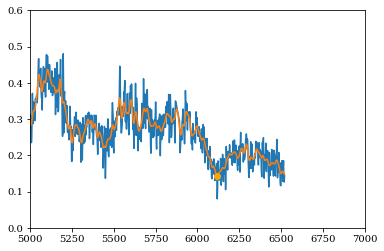

ps15bwh_20150914_goodman_Foundation.dat 0.0272594299711 -11.486503345380463 0.072671


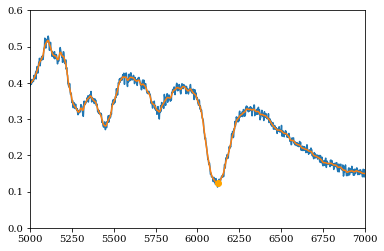

2005ki-53706.52.dat 1.28777849203 -11.290779369257717 0.0203841018576


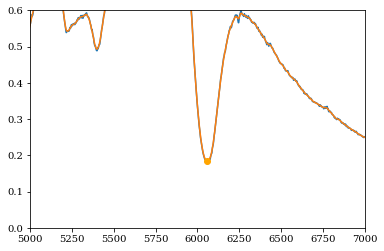

2007le-54401.07.dat 1.64204876113 -14.337777591065105 0.00680804318299


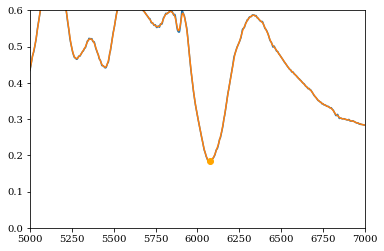

2002bo-52356.00.dat -1.2273042199 -13.548739780235412 0.00516023655272


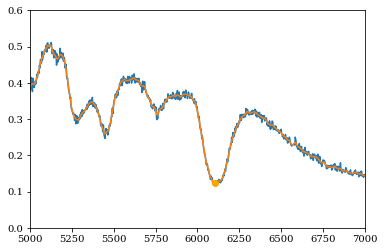

2006sr-54093.09.dat 0.207522934877 -11.976330519809686 0.0232160610258


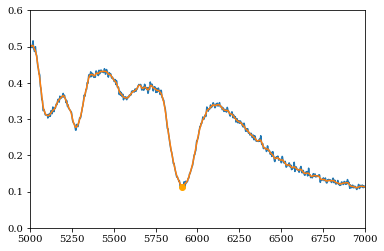

2007bd-54207.09.dat 0.313961669344 -21.72560261876043 0.0319587759609


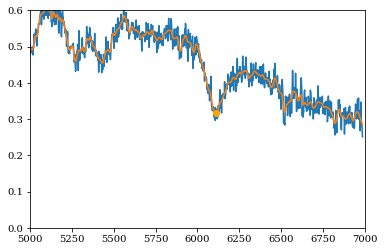

2017cpu_20170403_FLWO_Foundation.dat -1.37107201269 -11.780310993061766 0.0544045
2007on-54421.22.dat 1.15506115312 nan 0.00649


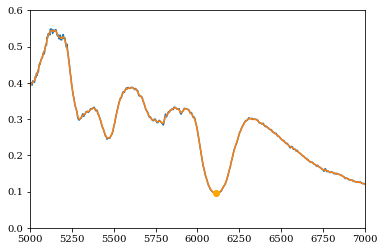

2006ef-53971.50.dat 1.49340232197 -11.780310993061766 0.017018440137


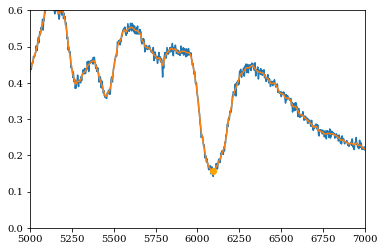

1998ef-51115.31.dat 1.56997352276 -12.565098143327868 0.0167449175789


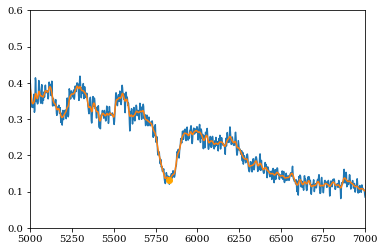

2006lu-54042.32.dat 3.45388733303 -25.683634954807275 0.05337


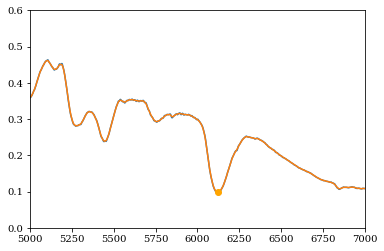

1996x-50191.00.dat -0.331540293328 -11.290779369257717 0.0070715588182


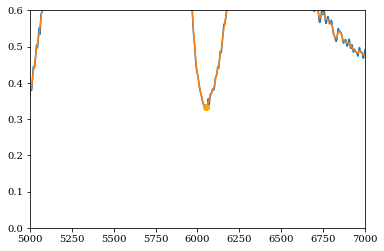

2005a-53381.00.dat -0.0640602221848 -14.733004167237274 0.0183526965178


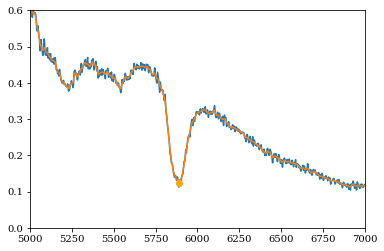

2006is-54013.36.dat -0.379679346086 -22.736260014720017 0.03133


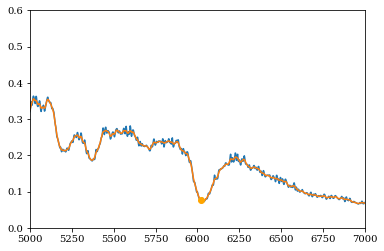

2004ey-53303.06.dat -1.43837392439 -16.219301744747316 0.0148035745449


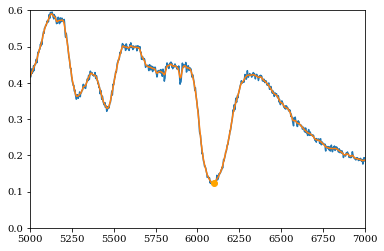

2001en-52193.39.dat 0.00162965780082 -12.466896361799964 0.014937000183


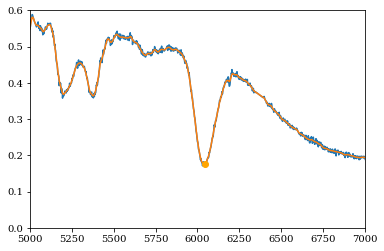

2007ca-54228.25.dat 0.593509027032 -15.128702271077849 0.0150804327439


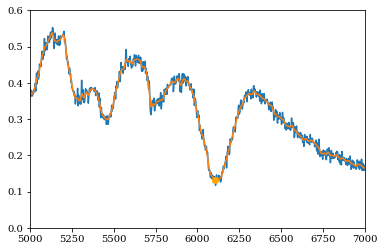

2004ef-53264.34.dat 0.0821060118688 -11.976330519809686 0.0297906093421


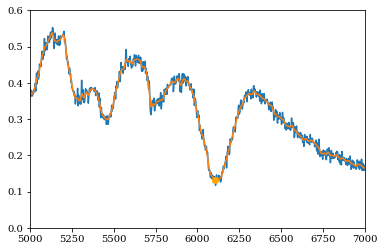

2004ef-53264.64.dat 0.373427371067 -11.976330519809686 0.0297906093421


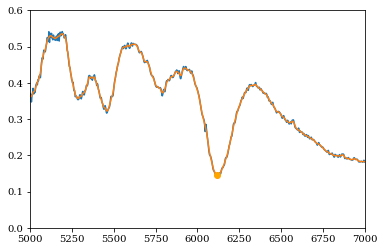

2001da-52106.00.dat -2.13041108781 -11.486503345380463 0.01597772016


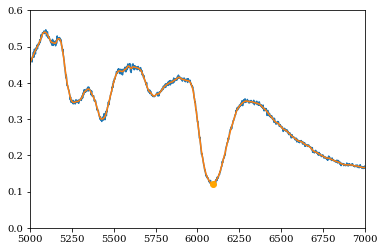

2002he-52584.60.dat -1.56498564564 -12.761590299337318 0.0248405181694


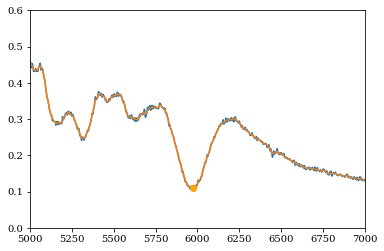

2007as-54178.07.dat -3.44316590669 -18.411176350635415 0.01756


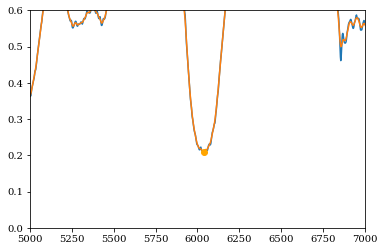

2006x-53785.00.dat -2.93680251438 -15.326728084622237 0.00319220839105


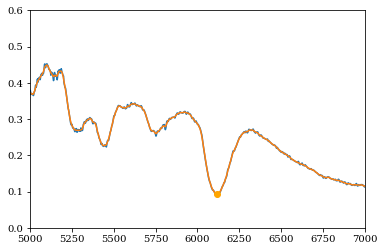

2006n-53759.30.dat -1.66287015573 -11.486503345380463 0.0142698719926


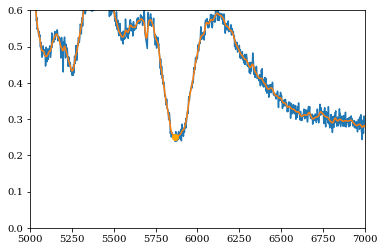

2007jg-54365.38.dat -1.1931319725 -23.95289680989148 0.03711


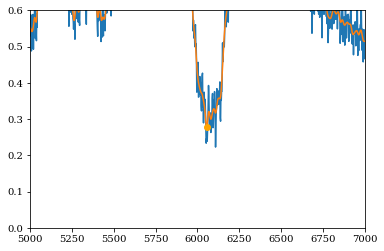

2006br-53855.18.dat 3.56035203872 -14.436540018845095 0.0255410027693


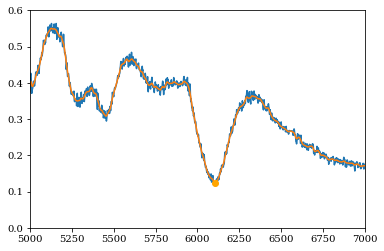

2004as-53085.27.dat -1.15002595973 -12.07438460450608 0.0320621808304


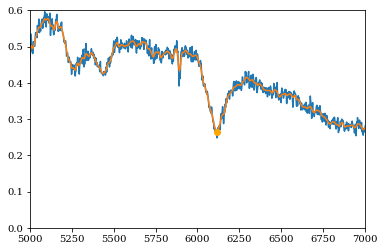

2002de-52431.22.dat -2.85629104486 -11.584409672466169 0.0282662214271


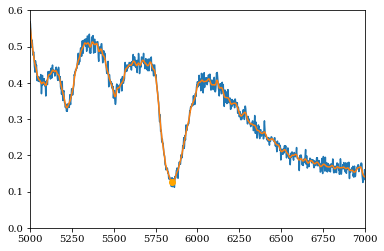

2007nq-54401.11.dat 2.70577550239 -24.766316043568047 0.045


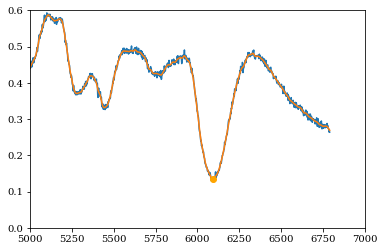

2017po_20170131_kosmos_Foundation.dat -0.813146340893 -12.761590299337318 0.0318278


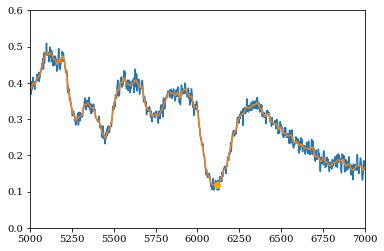

1999cc-51315.40.dat -0.134779895008 -11.388626576876426 0.0315284782781


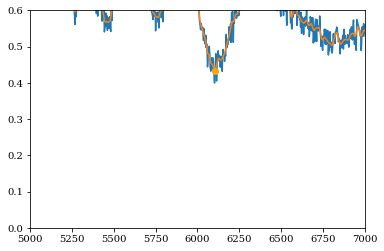

2005mc-53731.37.dat 0.882399629341 -12.172468233516442 0.0252


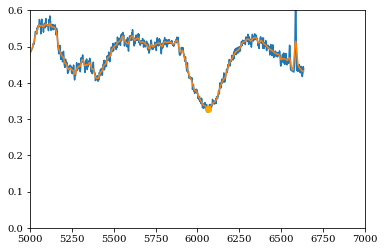

2017oz_20170131_kosmos_Foundation.dat -3.83016355391 -14.140341185775334 0.0556886


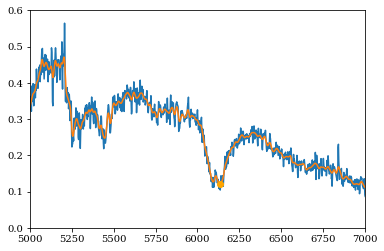

2005ag-53413.60.dat -1.07367973911 -10.704317028490788 0.07937


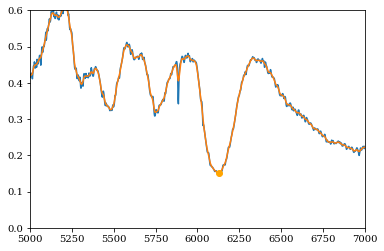

2004gs-53356.40.dat -0.443185636015 -10.997415134434632 0.0275157022129


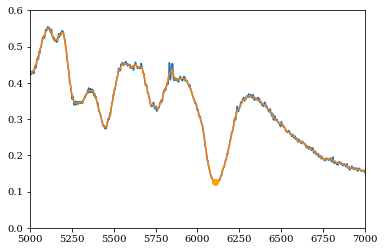

2005am-53437.25.dat 1.95348022129 -12.172468233516442 0.00769865931717


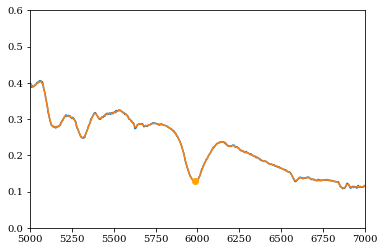

2008bf-54551.21.dat -3.82768397032 -17.811982230430747 0.0221720054078


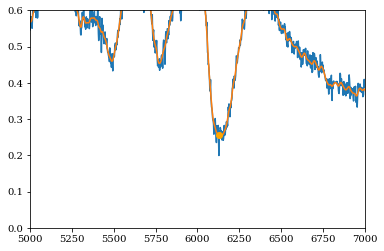

2006gj-54002.46.dat 2.52986638755 -10.899686192972935 0.027719176311


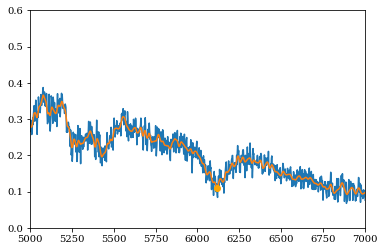

2006gr-54011.26.dat -2.14885093964 -11.486503345380463 0.033479828235


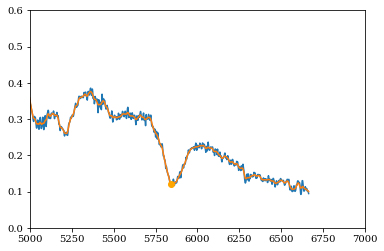

2005hc-53667.28.dat -0.308699314008 -25.071827749439823 0.0450311528518


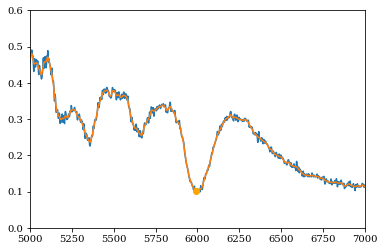

2006kf-54042.23.dat 1.16826290904 -17.512781557345757 0.0208143995404


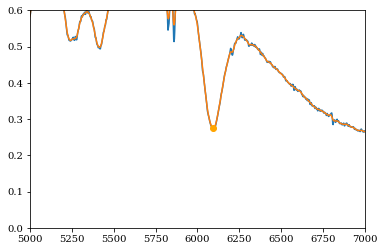

2008fp-54730.35.dat -0.700254260887 -12.565098143327868 0.00566


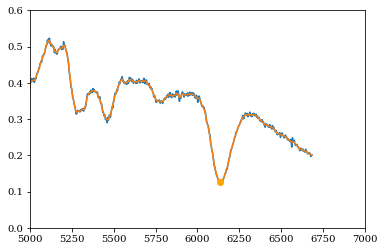

ps15aii_20150517_goodman_Foundation.dat -0.377604488655 -10.50906616967564 0.046549


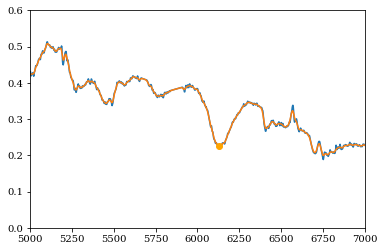

ps17bii_20170224_SALT_Foundation.dat -3.80066173463 -10.801986823599174 0.073391


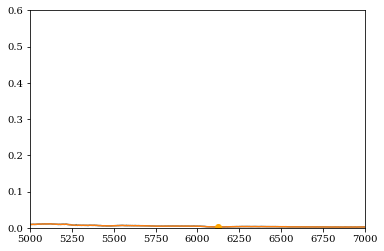

2006ob-54063.00.dat -0.381912167546 -11.192961724806997 0.0582969969178


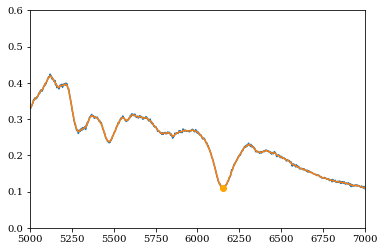

2002fk-52546.44.dat -1.60337867082 -9.729246126124085 0.00669463139063


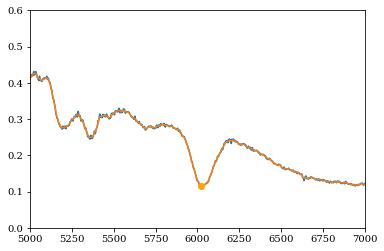

2006ax-53824.28.dat -3.1354028397 -16.020745999573485 0.0179690978083


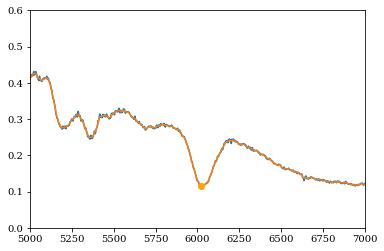

2006ax-53824.36.dat -3.05681499241 -16.020745999573485 0.0179690978083


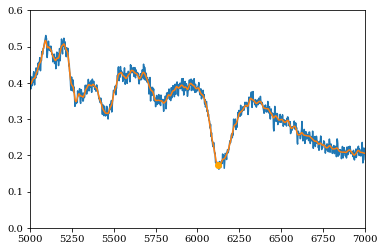

2006az-53825.37.dat -1.49011193631 -11.095173645785795 0.0314717723819


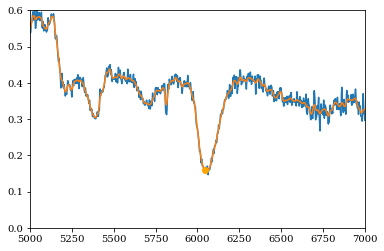

2005kc-53698.08.dat 0.377973611994 -14.930794290360334 0.0138996158469


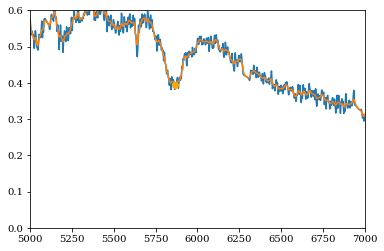

2006hx-54018.27.dat -3.77501090429 -23.95289680989148 0.04546
ps15cfn_20151011_goodman_Foundation.dat -3.84788948373 nan 0.1105695


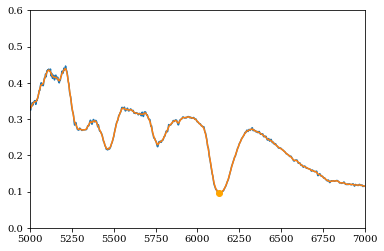

2007bc-54200.30.dat -0.00897946290624 -10.801986823599174 0.0218651264402


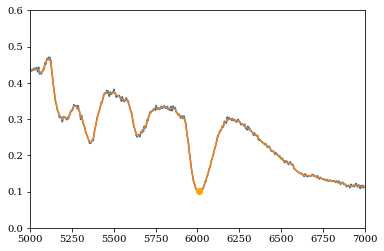

2007bc-54202.14.dat 1.79164955592 -16.815675012670447 0.0218651264402


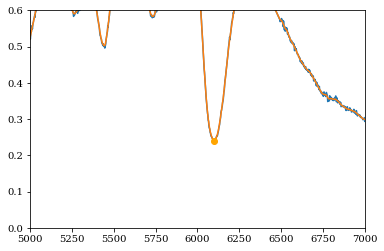

2007bm-54228.20.dat 3.24241559366 -12.270581404388267 0.00665793934016


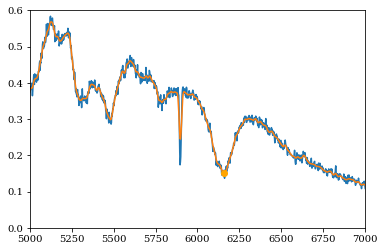

2006et-53996.36.dat 2.03493640917 -9.340046364602408 0.02216


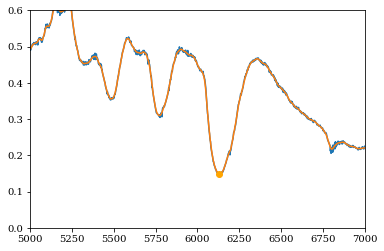

2008r-54496.03.dat 2.24003522481 -10.801986823599174 0.01349


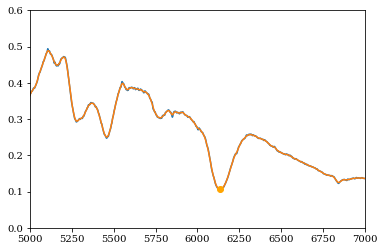

2005cf-53533.00.dat -1.23760344008 -10.606676809804412 0.00704487369058


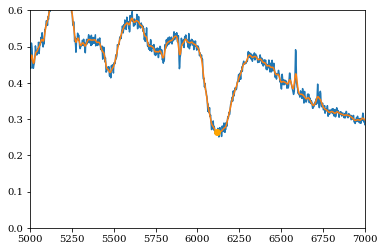

2008c-54470.00.dat 2.29520681481 -11.584409672466169 0.01661


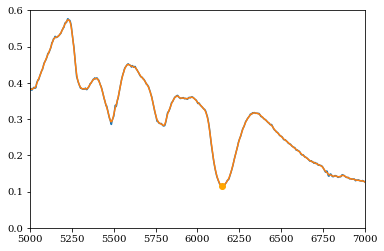

2004eo-53280.00.dat 1.55320223072 -9.92402359558339 0.0147468686487


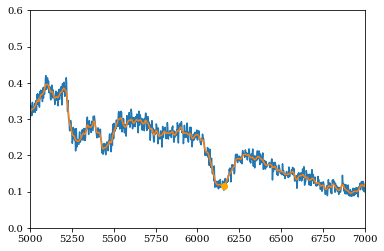

2002hu-52591.25.dat -1.15195216362 -9.534587044015712 0.0382264453097


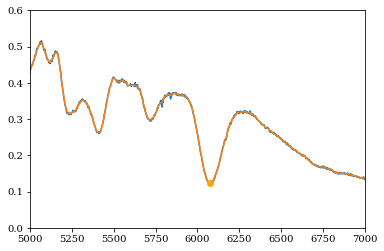

2006d-53759.32.dat 1.78567225121 -13.450242798100463 0.00893951775131


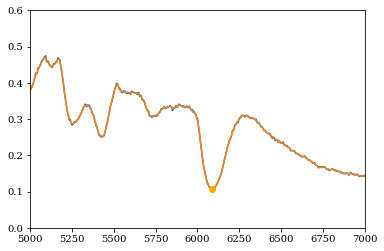

2007af-54173.30.dat -1.20448191458 -12.859880668678267 0.0063977593459


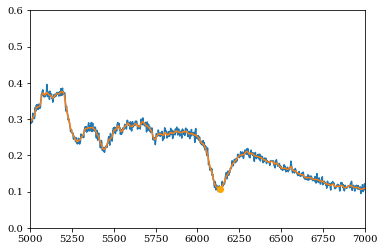

2005na-53739.34.dat -1.20799003717 -10.606676809804412 0.0268318958177


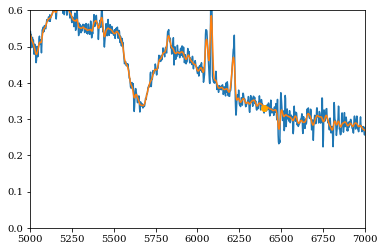

2006fw-54005.16.dat 2.61929155817 2.0216308539835866 0.08294


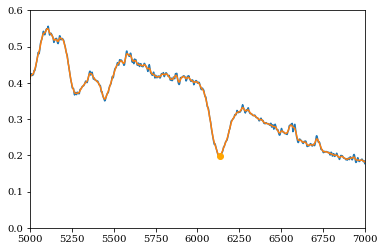

2005hj-53675.00.dat 0.596612191273 -10.704317028490788 0.05797


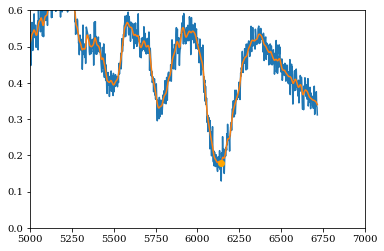

ps16cqa_20160608_kosmos_Foundation.dat 1.5218722904 -10.411485110219218 0.0438573


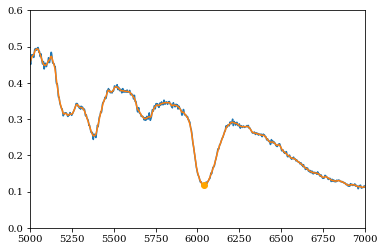

2005el-53648.38.dat 1.72242414035 -15.326728084622237 0.0148936368506


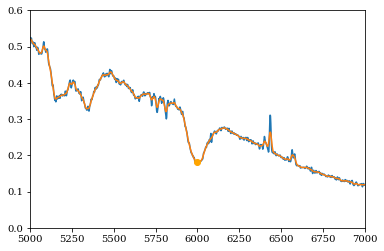

2005bg-53472.21.dat 1.80251497943 -17.413106748496762 0.02307


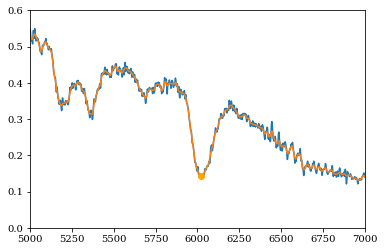

2007a-54113.04.dat -0.256960879689 -16.219301744747316 0.01763


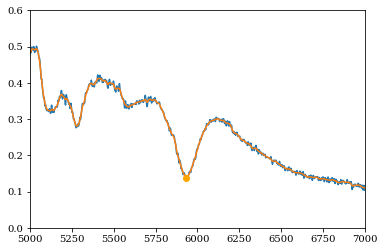

2008bq-54562.98.dat -0.799921661924 -20.51666882110082 0.03398


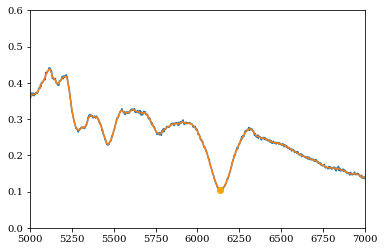

2002cr-52406.19.dat -2.70106644026 -10.50906616967564 0.0103805146426


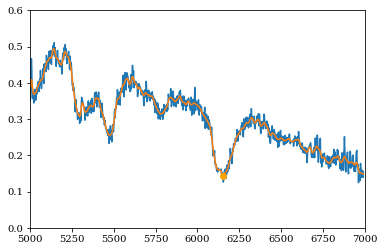

PS16fbb_20161201_flwo_Foundation.dat 3.31073102138 -9.729246126124085 0.0525


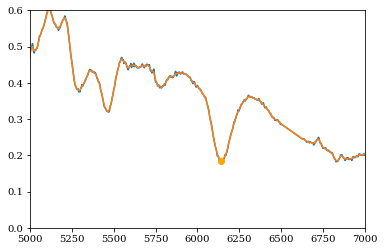

ps16fbb_20161125_SALT_Foundation.dat -2.38998156769 -10.216411741678657 0.0525


In [28]:
for comp in composites_test:
    v, si_min_wave = sa.measure_velocity(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], 5800, 6400, plot=False)
    print v
    
print

for spec in og_sn_arrays_test[1]: #high velocity
    v, si_min_wave = sa.measure_velocity(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2], 5800, 6400, plot=True)
    print spec.filename, spec.phase, v, spec.event_data['z']
    
for spec in og_sn_arrays_test[0]: #low velocity
    v, si_min_wave = sa.measure_velocity(spec.wavelength[spec.x1:spec.x2], spec.flux[spec.x1:spec.x2], 5800, 6400, plot=True)
    print spec.filename, spec.phase, v, spec.event_data['z']